In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [51]:
##CountVectorizer can lowercase letters, disregard punctuation and stopwords, but it can't LEMMATIZE or STEM
txt = ["He is ::having a great 12 Time @, at the park time?",
       "She, unlike most women, 12 is a big player on the park's grass.",
       "she can't be going"]

### TfidfVectorizer
#### The goal of using tf-idf is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

formula used: tf-idf(d, t) = tf(t) * idf(d, t)

            * tf(t)= the term frequency is the number of times the term appears in the document
            * idf(d, t) = the document frequency is the number of documents 'd' that contain term 't'

In [52]:
txt1 = ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']

tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(txt1)
txt_transformed = txt_fitted.transform(txt1)
print ("The text: ", txt1)

The text:  ['His smile was not perfect', 'His smile was not not not not perfect', 'she not sang']


In [53]:
tf.vocabulary_

{'his': 0, 'smile': 5, 'was': 6, 'not': 1, 'perfect': 2, 'she': 4, 'sang': 3}

In [54]:
idf = tf.idf_
print(dict(zip(txt_fitted.get_feature_names(), idf)))
print("\nWe see that the tokens 'sang','she' have the most idf weight because \
they are the only tokens that appear in one document only.")
print("\nThe token 'not' appears 6 times but it is also in all documents, so its idf is the lowest")

{'his': 1.4054651081081644, 'not': 1.0, 'perfect': 1.4054651081081644, 'sang': 2.09861228866811, 'she': 2.09861228866811, 'smile': 1.4054651081081644, 'was': 1.4054651081081644}

We see that the tokens 'sang','she' have the most idf weight because they are the only tokens that appear in one document only.

The token 'not' appears 6 times but it is also in all documents, so its idf is the lowest


Graphing inverse document frequency

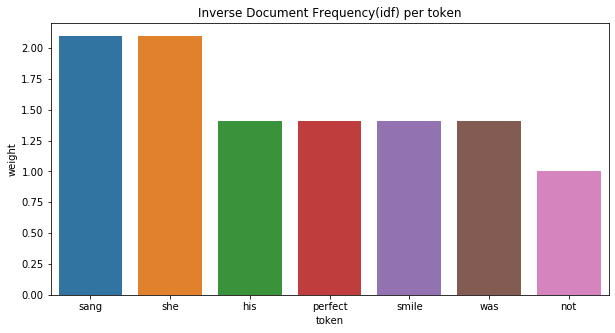

In [55]:
rr = dict(zip(txt_fitted.get_feature_names(), idf))
token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight 

sns.barplot(x='token', y='weight', data=token_weight)            
plt.title("Inverse Document Frequency(idf) per token")
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()


#### listing idf

In [56]:
# get feature names
feature_names = np.array(tf.get_feature_names())
print(tf.get_feature_names())
print(np.argsort(tf.idf_))
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

['his', 'not', 'perfect', 'sang', 'she', 'smile', 'was']
[1 0 2 5 6 3 4]
Features with lowest idf:
['not' 'his' 'perfect']

Features with highest idf:
['was' 'sang' 'she']


In [57]:
TfidfVectorizer()

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

#### Weight of tokens per document



In [58]:
print("The token 'not' has  the largest weight in document #2 because it appears 4 times there. But in document #1\
 its weight is 0 because it does not appear there.")
txt_transformed.toarray()

The token 'not' has  the largest weight in document #2 because it appears 4 times there. But in document #1 its weight is 0 because it does not appear there.


array([[1.40546511, 1.        , 1.40546511, 0.        , 0.        ,
        1.40546511, 1.40546511],
       [1.40546511, 4.        , 1.40546511, 0.        , 0.        ,
        1.40546511, 1.40546511],
       [0.        , 1.        , 0.        , 2.09861229, 2.09861229,
        0.        , 0.        ]])

Summary: the more times a token appears in a document, the more weight it will have. However, the more documents the token appears in, it is 'penalized' and the weight is diminished. For example, the weight for token 'not' is 4, but if it did not appear in all documents (that is, only in one document) its weight would have been 8.3

#### TF-IDF - Maximum token value throughout the whole dataset

In [60]:
new1 = tf.transform(txt1)

# find maximum value for each of the features over all of dataset:
max_val = new1.max(axis=0).toarray().ravel()

#sort weights from smallest to biggest and extract their indices 
sort_by_tfidf = max_val.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sort_by_tfidf[:3]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sort_by_tfidf[-3:]]))

Features with lowest tfidf:
['his' 'perfect' 'smile']

Features with highest tfidf: 
['sang' 'she' 'not']
